<a href="https://colab.research.google.com/github/itsnaeema/ML_Project/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Polynomial Regression
#its is useed to overcome the errors in simple reggression,it helps to increas the features of input(x)
import numpy as np
import pandas as pd
df=pd.read_excel('/content/poly.xlsx')
df


,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [ ]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [ ]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [ ]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [ ]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [ ]:
df.drop('sno',axis=1,inplace=True)

In [ ]:
x=df.iloc[:,:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [ ]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [ ]:
#no need of spliting into x test and y train data bcs there is only 6 sample
#we can use all data for model creation,also in regression model no need of normalization
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

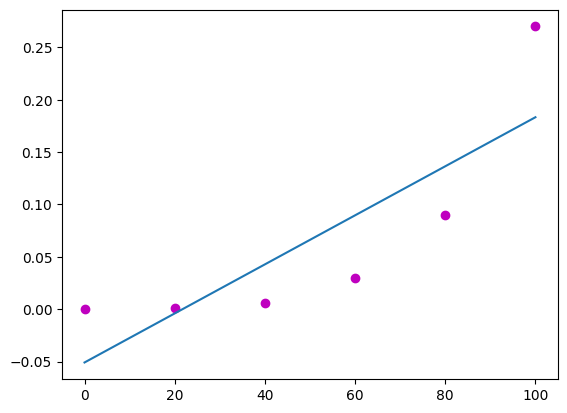

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='m')
plt.plot(x,y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
print("error is",mean_absolute_error(y,y_pred))
print("Percentage error is",mean_absolute_percentage_error(y,y_pred))

error is 0.047653333333333346
Percentage error is 44.775078189300416


In [ ]:
from sklearn.metrics import r2_score
print("R2_score is",r2_score(y,y_pred))

R2_score is 0.690349972603981


In [ ]:
#degree=2
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)#creating an object passing the degreee which u want
x_poly=poly.fit_transform(x)#input in x_poly
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [ ]:
model1=LinearRegression()#creating new redression
model1.fit(x_poly,y)#passing input and output
y_poly=model1.predict(x_poly)
y_poly

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

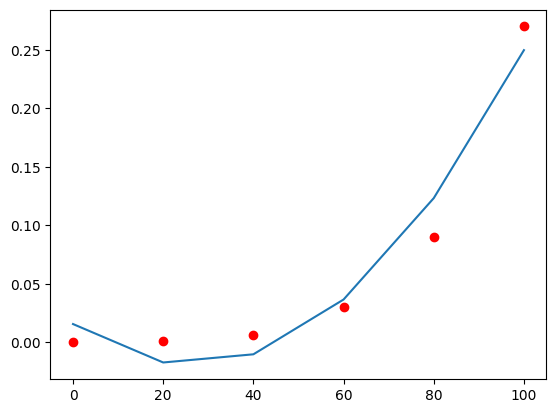

In [ ]:
plt.scatter(x,y,color='r')
plt.plot(x,y_poly)

In [ ]:
print("MAE is",mean_absolute_percentage_error)

MAE is <function mean_absolute_percentage_error at 0x7ed0a4f0f5b0>


In [ ]:
print("R2 score is",r2_score(y,y_poly))

R2 score is 0.9568461098911795
